In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# pd.set_option('max_columns', 500)
# pd.set_option('max_rows', 500)

In [3]:
book = pd.read_csv('./data/Books.csv')
rating = pd.read_csv('./data/Ratings.csv')
user = pd.read_csv('./data/Users.csv')

/var/folders/rc/3jzqjhp56_v2qxb49fkb1x880000gn/T/ipykernel_4513/1375886182.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book = pd.read_csv('./data/Books.csv')


## book 데이터

In [6]:
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [7]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [10]:
book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [88]:
book.describe()

,Year-Of-Publication
count,271357.000000
mean,1959.760817
std,257.994226
min,0.000000
25%,1989.000000
50%,1995.000000
75%,2000.000000
max,2050.000000


#### book 데이터에서 출판년도 분포 알아보기

In [26]:
def convert_to_int_or_nan(value):
    try:
        return int(value)
    except ValueError:
        return np.nan

# 'Year-Of-Publication' : 숫자로 변환하거나 변환 불가능한 경우 NaN으로 변환
book['Year-Of-Publication'] = book['Year-Of-Publication'].apply(lambda x: convert_to_int_or_nan(x))
book['Year-Of-Publication'].value_counts().sort_index()

Year-Of-Publication
0.0       4618
1376.0       1
1378.0       1
1806.0       1
1897.0       1
          ... 
2026.0       1
2030.0       7
2037.0       1
2038.0       1
2050.0       2
Name: count, Length: 116, dtype: int64

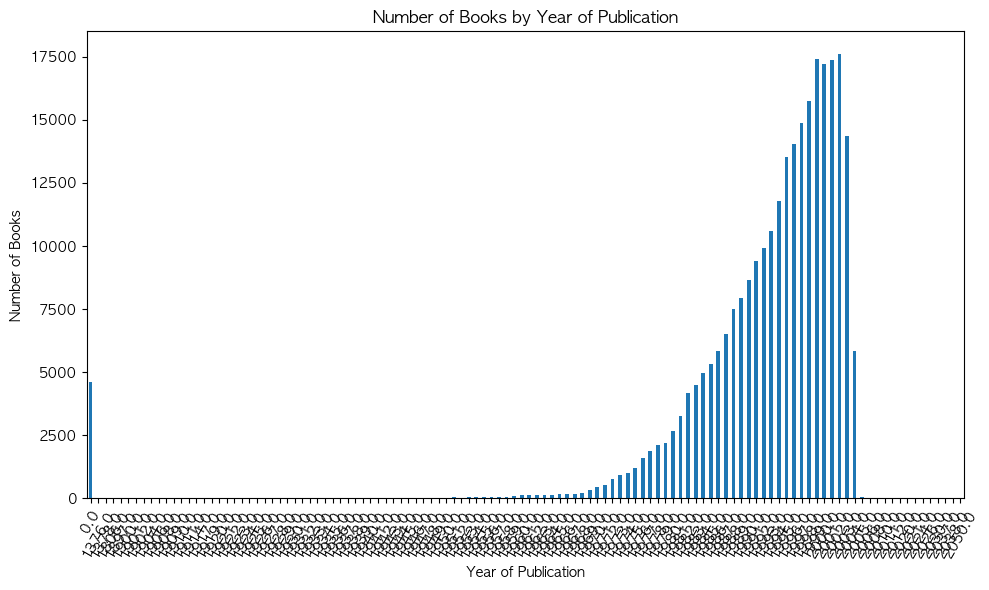

In [77]:
book['Year-Of-Publication'] = pd.to_numeric(book['Year-Of-Publication'], errors='coerce')

year_counts = book.groupby('Year-Of-Publication').size()

plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.title('Number of Books by Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

#### 출발년도가 현재시점 2024년도보다 위인 것은 null값 처리

In [30]:
book_dp = book.copy()
book_dp.loc[book_dp['Year-Of-Publication'] > 2024, 'Year-Of-Publication'] = 0
book_dp['Year-Of-Publication'] = book_dp['Year-Of-Publication'].apply(lambda x: int(x) if pd.notnull(x) else x)
book_dp

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988.0,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991.0,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004.0,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996.0,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


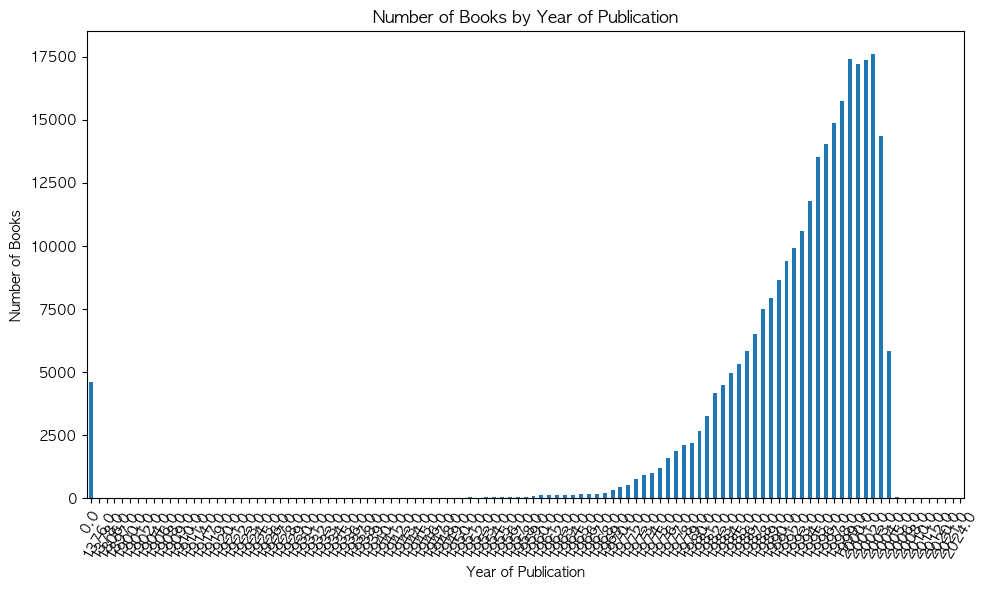

In [31]:
book_dp['Year-Of-Publication'] = pd.to_numeric(book_dp['Year-Of-Publication'], errors='coerce')

year_counts = book_dp.groupby('Year-Of-Publication').size()

plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.title('Number of Books by Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

#### book 데이터에서 출판사에 따른 책의 평균 평점 알아보기

시각화가 되지 않기 때문에 먼저 출판사 문자열들을 다듬어야 할 것 같다.

In [ ]:
book['Publisher'] = book['Publisher'].apply(lambda x:x.)

In [33]:
len(book['Publisher'].unique())

16808

In [37]:
book.groupby('Publisher').size()

Publisher
 Editions P. Terrail                            1
 Tri-State Press                                1
'K' Pub                                         1
(3 Queen Sq., WC1N 3AU), Faber and Faber Ltd    1
(49 Poland St., W.1), BPC Unit 75               1
                                               ..
Ã?lbaum                                         1
Ã?sterreichische Staatsdruckerei                1
Ã?sterreichischer Bundesverlag                  1
Ã?Â?ditions 10/18                               1
Ã?Â¶bv&amp;hpt                                  1
Length: 16807, dtype: int64

In [43]:
average_rating = rating.groupby('ISBN')['Book-Rating'].mean().reset_index()
average_rating['Book-Rating'] = average_rating['Book-Rating'].round().astype(int) 
average_rating

,ISBN,Book-Rating
0,0330299891,3
1,0375404120,2
2,0586045007,0
3,9022906116,4
4,9032803328,0
...,...,...
340551,cn113107,0
340552,ooo7156103,7
340553,§423350229,0
340554,´3499128624,8


In [75]:
book_rating = pd.merge(book, average_rating, on='ISBN', how='left')
book_rating

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,5.0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,4.0
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,0.0
...,...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988.0,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,7.0
271356,0525447644,From One to One Hundred,Teri Sloat,1991.0,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,4.0
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004.0,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,0.0
271358,0192126040,Republic (World's Classics),Plato,1996.0,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,0.0


In [76]:
book_rating.groupby(['Publisher'])['Book-Rating'].mean()

Publisher
 Editions P. Terrail                            10.0
 Tri-State Press                                 6.0
'K' Pub                                          8.0
(3 Queen Sq., WC1N 3AU), Faber and Faber Ltd     0.0
(49 Poland St., W.1), BPC Unit 75                0.0
                                                ... 
Ã?lbaum                                          8.0
Ã?sterreichische Staatsdruckerei                 0.0
Ã?sterreichischer Bundesverlag                   0.0
Ã?Â?ditions 10/18                                0.0
Ã?Â¶bv&amp;hpt                                   0.0
Name: Book-Rating, Length: 16807, dtype: float64

In [77]:
book_rating.groupby('Publisher')['Book-Rating'].value_counts().head(10)

Publisher                                     Book-Rating
 Editions P. Terrail                          10.0           1
 Tri-State Press                              6.0            1
'K' Pub                                       8.0            1
(3 Queen Sq., WC1N 3AU), Faber and Faber Ltd  0.0            1
(49 Poland St., W.1), BPC Unit 75             0.0            1
10-18                                         0.0            9
                                              7.0            5
                                              8.0            4
                                              4.0            4
                                              3.0            4
Name: count, dtype: int64

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = '/Users/kimminyoung/Library/Fonts/NanumBarunGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

publisher_avg_rating = book_rating.groupby('Publisher')['Book-Rating'].mean()
publisher_avg_rating

Publisher
 Editions P. Terrail                            10.0
 Tri-State Press                                 6.0
'K' Pub                                          8.0
(3 Queen Sq., WC1N 3AU), Faber and Faber Ltd     0.0
(49 Poland St., W.1), BPC Unit 75                0.0
                                                ... 
Ã?lbaum                                          8.0
Ã?sterreichische Staatsdruckerei                 0.0
Ã?sterreichischer Bundesverlag                   0.0
Ã?Â?ditions 10/18                                0.0
Ã?Â¶bv&amp;hpt                                   0.0
Name: Book-Rating, Length: 16807, dtype: float64

In [79]:
# 산점도로 시각화
plt.figure(figsize=(10, 6))
plt.scatter(publisher_avg_rating.index, publisher_avg_rating.values)
plt.title('Publisher vs. Average Rating', fontproperties=font_prop)  # 한글 제목 설정
plt.xlabel('Publisher', fontproperties=font_prop)  # x축 레이블 한글 설정
plt.ylabel('Average Rating', fontproperties=font_prop)  # y축 레이블 한글 설정
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/Users/kimminyoung/opt/anaconda3/envs/bookrec/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 195 (\N{LATIN CAPITAL LETTER A WITH TILDE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimminyoung/opt/anaconda3/envs/bookrec/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 194 (\N{LATIN CAPITAL LETTER A WITH CIRCUMFLEX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimminyoung/opt/anaconda3/envs/bookrec/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 173 (\N{SOFT HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimminyoung/opt/anaconda3/envs/bookrec/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 174 (\N{REGISTERED SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: 
Bottom Line Pre$$
               ^
ParseException: Expected end of text, found '$'  (at char 15), (line:1, col:16)

<Figure size 1000x600 with 1 Axes>

## user 데이터

In [5]:
user

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [8]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [11]:
user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [12]:
user.Age.min()

0.0

In [11]:
user.Age.max()

244.0

In [16]:
sorted(user.Age.unique())

[nan,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 113.0,
 114.0,
 115.0,
 116.0,
 118.0,
 119.0,
 123.0,
 124.0,
 127.0,
 128.0,
 132.0,
 133.0,
 136.0,
 137.0,
 138.0,
 140.0,
 141.0,
 143.0,
 146.0,
 147.0,
 148.0,
 151.0,
 152.0,
 156.0,
 157.0,
 159.0,


In [87]:
user.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


인터넷 검색 결과 전세계에서 최고령자의 나이는 117세.

In [17]:
user_c = user.copy()

In [18]:
user_c['Age'] = user['Age'].apply(lambda x: None if x > 117 else x)

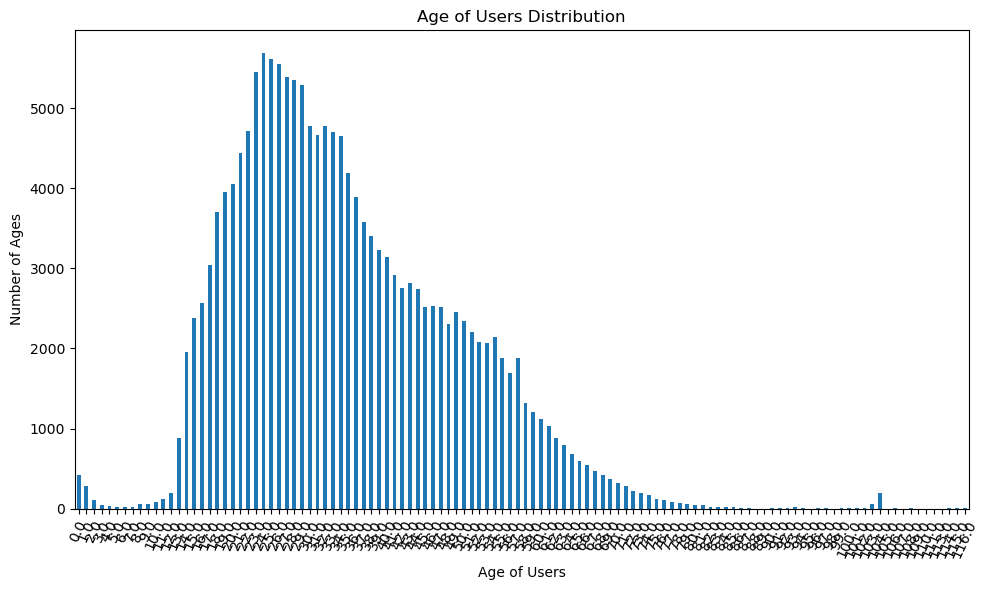

In [20]:
user_c['Age'] = pd.to_numeric(user_c['Age'], errors='coerce')

age_countsc = user_c.groupby('Age').size()

plt.figure(figsize=(10, 6))
age_countsc.plot(kind='bar')

plt.title('Age of Users Distribution')
plt.xlabel('Age of Users')
plt.ylabel('Number of Ages')
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

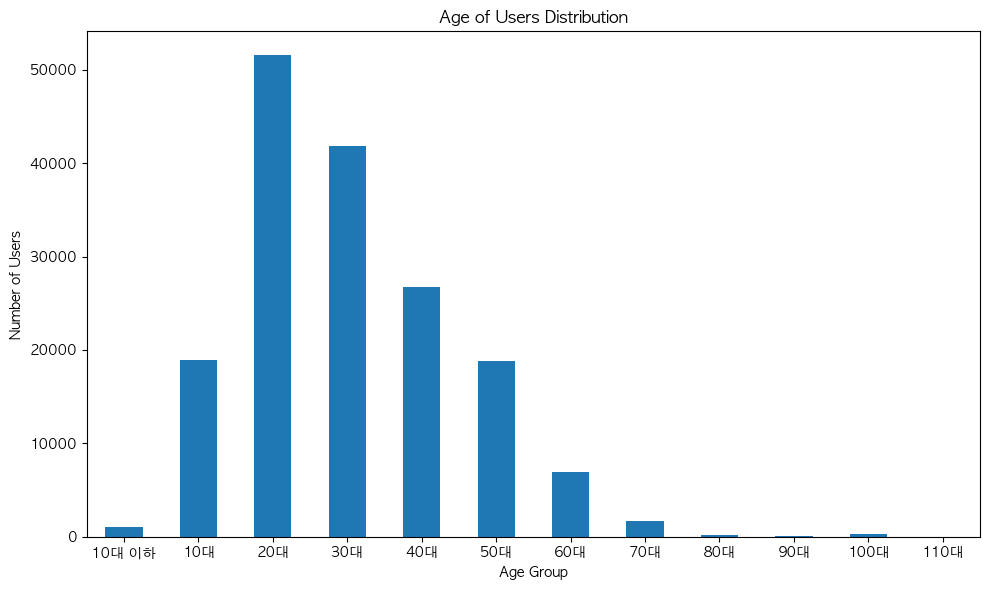

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

user_c['Age'] = pd.to_numeric(user_c['Age'], errors='coerce')

# 나이대를 그룹화하고 그룹별 개수를 계산합니다.
bins = [10 * i for i in range(13)]
labels = ["10대 이하"]
for i in range(10, 120, 10):
    labels.append(f'{i}대')
user_c['Age_Group'] = pd.cut(user_c['Age'], bins=bins, labels=labels, right=False)
age_counts = user_c.groupby('Age_Group').size()

plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar')

plt.title('Age of Users Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

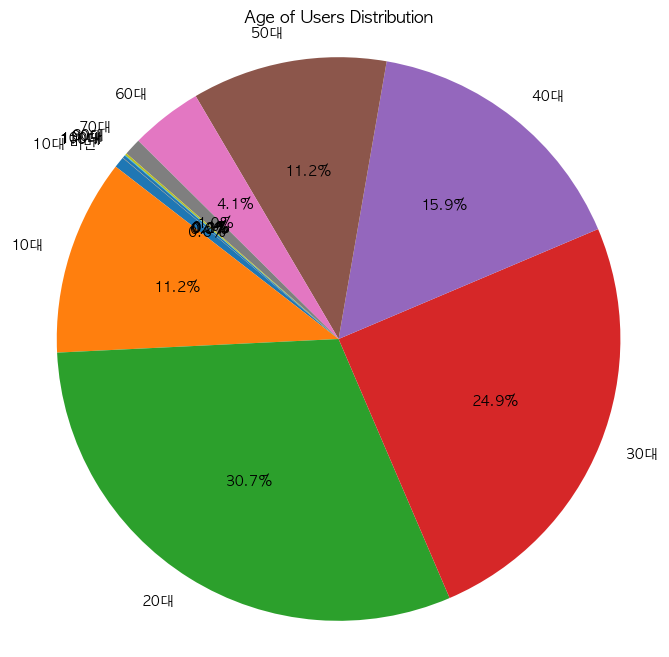

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

user_c['Age'] = pd.to_numeric(user_c['Age'], errors='coerce')

# 나이대를 그룹화하고 그룹별 개수를 계산합니다.
bins = [10 * i for i in range(13)]
labels = ["10대 미만"]
for i in range(10, 120, 10):
    labels.append(f'{i}대')
user_c['Age_Group'] = pd.cut(user_c['Age'], bins=bins, labels=labels, right=False)
age_counts = user_c.groupby('Age_Group').size()

plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Age of Users Distribution')
plt.axis('equal')  # 원을 원형으로 유지합니다.
plt.show()

20~40대가 데이터의 70퍼센트를 차지.

## rating 데이터

In [6]:
rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [9]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [12]:
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [46]:
rating['Book-Rating'].value_counts()

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

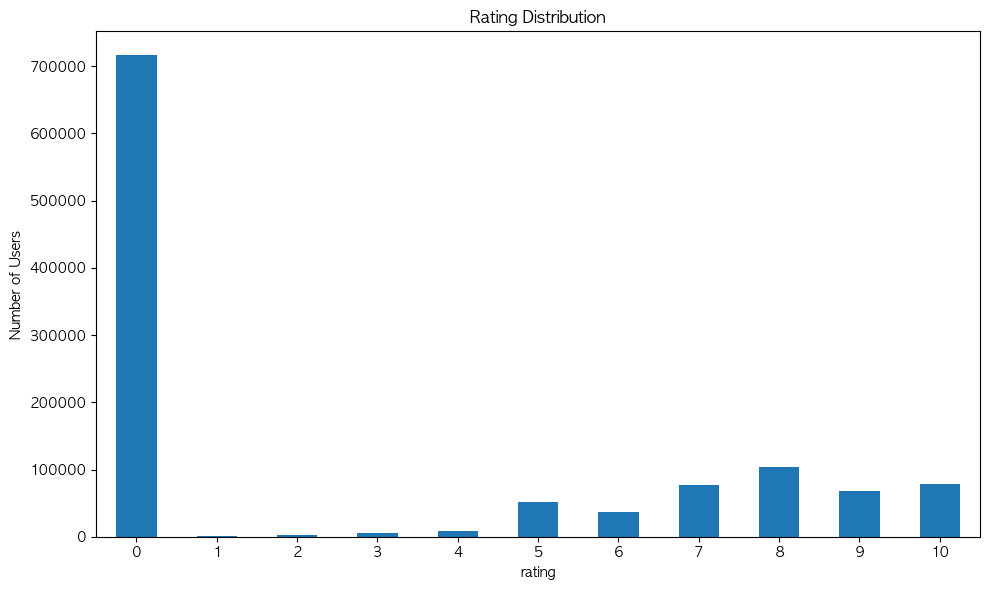

In [31]:
rating['Book-Rating'] = pd.to_numeric(rating['Book-Rating'], errors='coerce')

rating_counts = rating.groupby('Book-Rating').size()

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar')
plt.title('Rating Distribution')
plt.xlabel('rating')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

평점은 1~10까지의 명시적인 수치로 나타내고, 0의 경우는 사용자가 책을 읽었지만, 명시적인 평가를 하지 않은 것.

In [34]:
#0을 제외한다면, 
rating_dp = rating[rating['Book-Rating'] != 0]
rating_dp

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
...,...,...,...
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


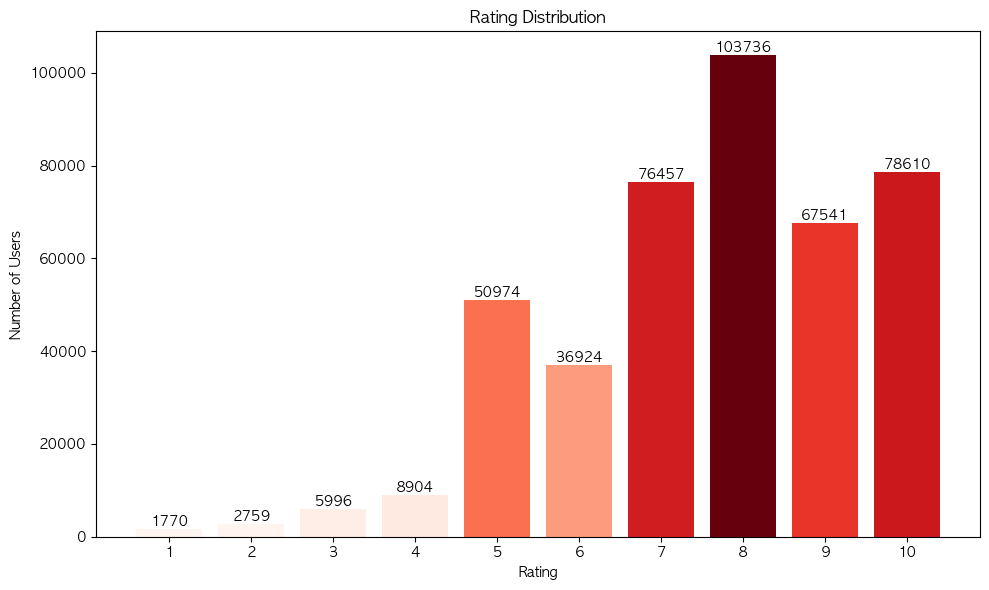

In [61]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# ratings_counts 평점이 index, 데이터 수가 value인 구조
rating_counts = rating_dp.groupby('Book-Rating').size()

# 데이터의 값 정규화
normalized_values = (rating_counts - min(rating_counts)) / (max(rating_counts) - min(rating_counts))

# 색상 맵 생성 (빨간색을 기준으로)
cmap = plt.cm.Reds

plt.figure(figsize=(10, 6))
bars = plt.bar(rating_counts.index, rating_counts, color=cmap(normalized_values))

plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Users')

# 모든 rating 점수를 xticks에 수동으로 설정
plt.xticks(rating_counts.index)

# 텍스트의 위치를 조정하여 막대의 중심에 오도록 설정
for bar, y in zip(bars, rating_counts):
    plt.text(bar.get_x() + bar.get_width()/2, y, y, ha='center', va='bottom')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
